# Global sensitivity analysis using the Sobol method

In [1]:
# Import dependencies
%matplotlib inline
import pandas as pd
import numpy as np
from SALib.analyze import sobol
import plot
import matplotlib.pyplot as plt

Read in the data and create the output variables

In [2]:
# Read the data
data = pd.read_csv('../Data/batchrun01-02-2018.csv')

# Create output variables
data['total'] = np.round(data['N'] // 2) + np.round((data['N'] // 2) * data['ratio']) + data['N'] - np.round(data['N'] // 2) - np.round(
    (data['N'] // 2) * data['ratio'])
data['pfl_net'] = (data['pheromone'] - data['followers'] - data['leaders']) / data['total']
data['pu_net'] = (data['pheromone'] - data['unassigned']) / data['total']
data['flu_net'] = (data['followers'] + data['leaders'] - data['unassigned']) / data['total']
params = ['p_uf', 'p_pu', 'p_up', 'p_fl', 'p_lu', 'g', 'ratio', 'N', 'size']

Compute the first order and total order sensitivity indices using the Sobol method. By changing the 'output' variable different output variables can be tested. The naming scheme is:

- 'pfl-net' : (pheromoners - followers - leaders)/total
- 'pu-net' : (pheromoners - unassigned)/total
- 'flu-net' : (followers + leaders - unassigned)/total

In [3]:
problem = {
    'num_vars': 9,
    'names': params,
    'bounds': [[0, 1]] * 5 + [[0, 0.5]] + [[0, 1]] + [[10, 200]] + [[3, 20]]
}

output = 'pfl_net'
Si = sobol.analyze(problem, data[output].as_matrix(), print_to_console=True)

Parameter S1 S1_conf ST ST_conf
p_uf 0.003066 0.016164 0.094790 0.017385
p_pu 0.336425 0.046215 0.674579 0.036754
p_up 0.224872 0.042053 0.583114 0.037320
p_fl 0.007505 0.016017 0.104576 0.015313
p_lu 0.023506 0.023157 0.145052 0.022764
g 0.010670 0.015238 0.088463 0.015267
ratio 0.018206 0.017588 0.141046 0.020758
N 0.009737 0.018516 0.115011 0.016986
size -0.002448 0.017241 0.089094 0.014825

Parameter_1 Parameter_2 S2 S2_conf
p_uf p_pu -0.003043 0.018137
p_uf p_up -0.016473 0.022164
p_uf p_fl -0.012329 0.020304
p_uf p_lu -0.008256 0.020892
p_uf g -0.007199 0.020023
p_uf ratio -0.004507 0.020355
p_uf N -0.007473 0.019984
p_uf size -0.006660 0.020098
p_pu p_up 0.198844 0.052707
p_pu p_fl 0.001598 0.047239
p_pu p_lu -0.001075 0.052113
p_pu g -0.007083 0.049689
p_pu ratio 0.005705 0.049724
p_pu N 0.000125 0.050293
p_pu size 0.008577 0.049088
p_up p_fl 0.003178 0.044890
p_up p_lu 0.019730 0.043681
p_up g 0.014099 0.043628
p_up ratio 0.013853 0.043475
p_up N 0.016379 0.044483
p_up size 0.

Plotting it gives more insight:

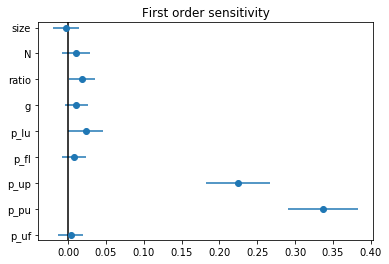

In [8]:
# First order
plot.plot_index(Si, params, '1', title='First order sensitivity')
plt.show()

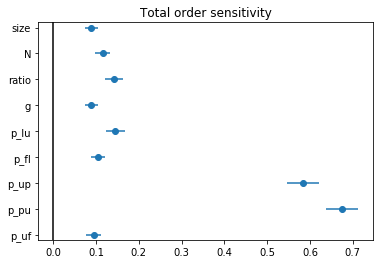

In [6]:
# Total order
plot.plot_index(Si, params, 'T', title='Total order sensitivity')
plt.show()